# Customer Profile Analysis

## INTRODUCTION

In marketing and business strategy, companies such as Rolls-Royce, while often seen as eschewing traditional advertising, may indeed engage in strategic marketing endeavors. Let us begin by making certain assumptions and logically deducing the potential outcomes of such campaigns.

It is estimated that roughly 5% of the global population possesses the financial means to comfortably afford Rolls-Royce products. This implies that out of every 20 individuals exposed to their advertising efforts, only one represents a potential customer. Furthermore, it is essential to recognize that individuals within this 5% bracket are discerning buyers who do not make impulsive purchases. They typically do not heavily engage with conventional advertising channels.

In conclusion, if Rolls-Royce were to embark on an advertising campaign, it would allocate substantial resources for a relatively low probability of reaching its target audience. However, companies like Rolls-Royce are known for their ability to identify and effectively reach their potential customers. They meticulously study their customer base and employ precise targeting strategies.

Understanding one's customer base is paramount in any business endeavor, as it not only conserves resources but also optimizes resource allocation, tailors marketing strategies, and enhances overall customer satisfaction.

This project aims to analyze user data collected during a marketing campaign and construct a comprehensive customer profile for the company. Our objective is to assess the marketing campaign data, identify bottlenecks, and pinpoint areas for improvement."

## EXECUTIVE SUMMARY

Based on the analysis of the data collected, the company has successfully attracted 200 customers through various marketing channels employed during the campaign. Our analysis reveals several key insights that can inform the company's marketing strategies and customer segmentation.

1. **Gender-Based Differentiation:** The data shows that while females slightly outnumber males, there is no significant difference in terms of age, spending score, and annual income between the two genders. Therefore, gender-based differentiation in marketing strategies is not warranted.

2. **Age and Customer Patterns:** The age distribution of customers indicates that the majority fall within the middle-aged category, with a notable presence of young customers and a smaller proportion of older customers. Income analysis suggests that most customers are in the middle-income bracket, with a higher number of low-income earners compared to high-income earners. Spending scores reveal that a substantial percentage of customers have a medium spending score, implying that most customers exhibit average spending behavior.

3. **Age Groups:** Further dividing customers into three age groups highlights that the first age group (young) shows no significant differences in income or spending score. This suggests that these customers are willing to make purchases regardless of their income level. The other two age groups predominantly consist of medium income earners.

4. **Hypothesis Testing:** The results of the hypothesis test indicate a significant difference in spending scores between age groups but no significant evidence of differentiation based on income levels. This suggests that customers are inclined to make purchases irrespective of their income, making age-based segmentation more effective.

5. **Marketing Allocation:** The company allocated the majority of its marketing budget (72.6%) to the Facebook marketing campaign, surpassing all other campaigns combined. Facebook exhibited higher impression rates and outperformed other marketing metrics, with the exception of the conversion rate.

6. **Competitive Conversion Rate:** The conversion rate across all campaigns is competitive, with Facebook slightly trailing behind other campaigns in this specific metric. This suggests that the company's marketing efforts have been effective in engaging and converting potential customers across various channels.

In conclusion, the data analysis underscores the importance of age-based customer segmentation and the high allocation of resources to the Facebook marketing campaign. The company can leverage these insights to refine its marketing strategies, allocate resources more efficiently, and tailor its messaging to cater to the diverse needs of its customer base.

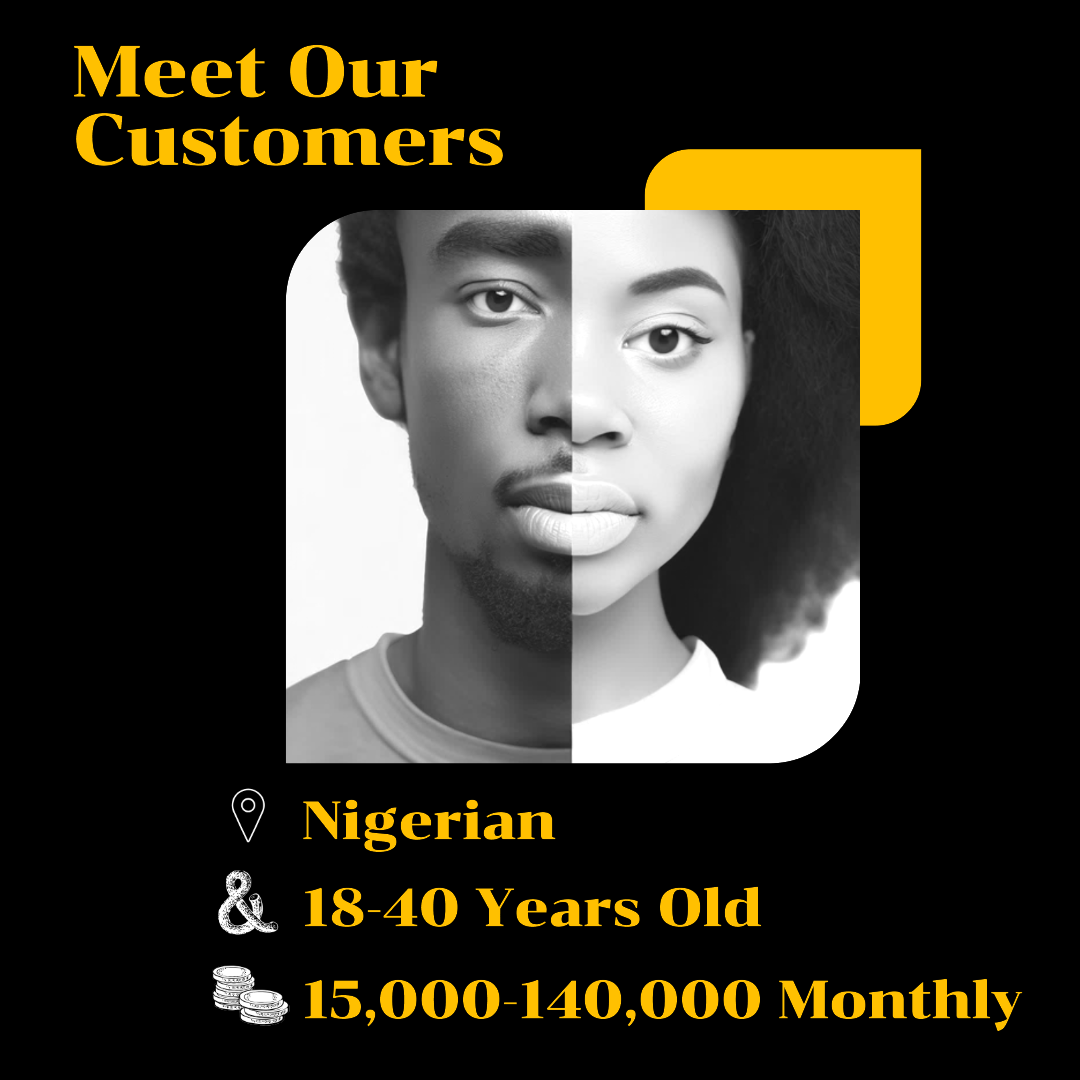

### We first Import the necessary libraries for data manupulation and visualization 

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from jupyter_datatables import init_datatables_mode

In [2]:
warnings.filterwarnings("ignore")

### We then import the file from our local machine using pandas and passing it to a container(decleared variable) named data as a dataframe. The file is in a csv format

In [3]:
file="mall_customers.csv"
file2="campaign.csv"
data=pd.read_csv(file)
df=pd.read_csv(file2)

### We then view the top 20 records in the data to undersand what the data looks like

In [4]:
data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### we used the method data.info to tell us the necessary information of the data 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We can see the data is in a pandas data frame, it has 5 columns and a total of 200 records. No missing records and the columns are all integers except for the column Genre which is a misspled Gender and its of an object data type

### We then went ahead and fix the columns and removing the columns not necessary for our analysis 

In [6]:
data.rename(columns={"Annual_Income_(k$)":"Annual_Income_kNaira", "Genre":"Gender"}, inplace=True)
data.drop("CustomerID",axis=1, inplace=True)

### We then run the describe method to get the summary statistics of all our columns

In [7]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_Income_kNaira,200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending_Score,200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


> Gender of the customers which is a categorical variable has 2 unique values with the value "Female" been the most frequent value with 112 observations out of 200.
> The average customer is 39 years old with minimum age of 18, 25% of the customers are within the age of 29, 50% of them are within 36 years old, 75% are within 49 years old and the oldest customer is 70 years old.
> The annual income of the customers is represented as N1000 hence the kNaira. The average customer earn N60,500. The minimum annual income of a customer is N15,000, 25% of the customers are within N41,500, 50% are within the range of N78,000 and the maximum annual income of a customer is N137,000.
> The average Customer has a spending score of 50.2 with minimum score at 1, 25% of the customers are within 35 spending score, 50% are within 50, 75% are within 73 with maximum score at 99

> The statistics has decribed the observations to be close in value to each other. As shown the average customer is always close to where 50% of the customers are in all columns 

### We Visualize the number of Customers by Gender

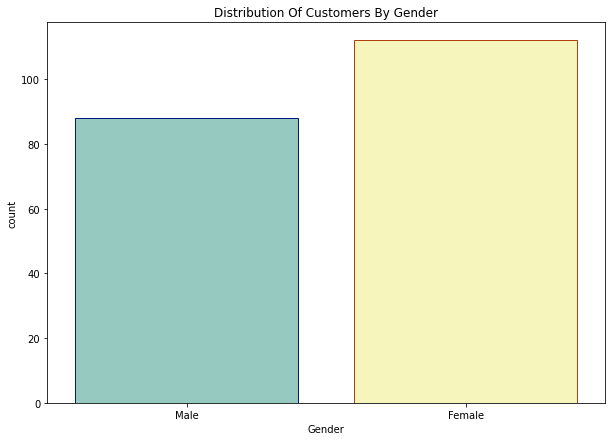

In [8]:
plt.figure(figsize=(10,7))
plt.title('Distribution Of Customers By Gender')
sns.countplot(x="Gender", data=data, palette="Set3",edgecolor=sns.color_palette("dark",2 ) )
plt.show()

The bar chart compares the customers by gender but unfortunately we can see there is no significant diffrence between the two. 88 of the customers are male and 112 are female. This tells us there is no gender barrier in customers.  

### We Visualize to compare the Customers based on their Gender and Spending Score

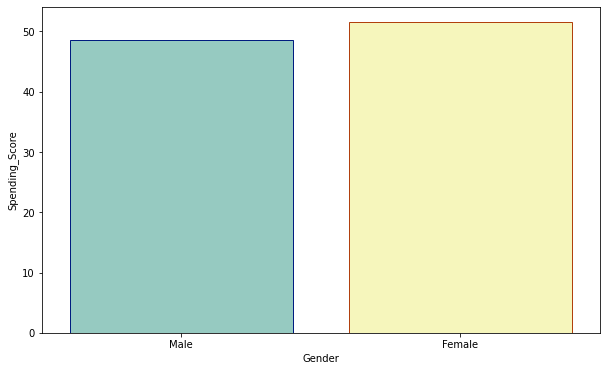

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x="Gender", y="Spending_Score", ci=None,palette="Set3",edgecolor=sns.color_palette("dark",2 ))
plt.show()

We can see even spending score is not a criteria to diffrenciate the customers based on gender as both are within the threshold of average spending score of a customer 

### We visualize the distribution of Customers Age, Annual Income and Spending Score Using Histogram And Kernerl Density Estimate

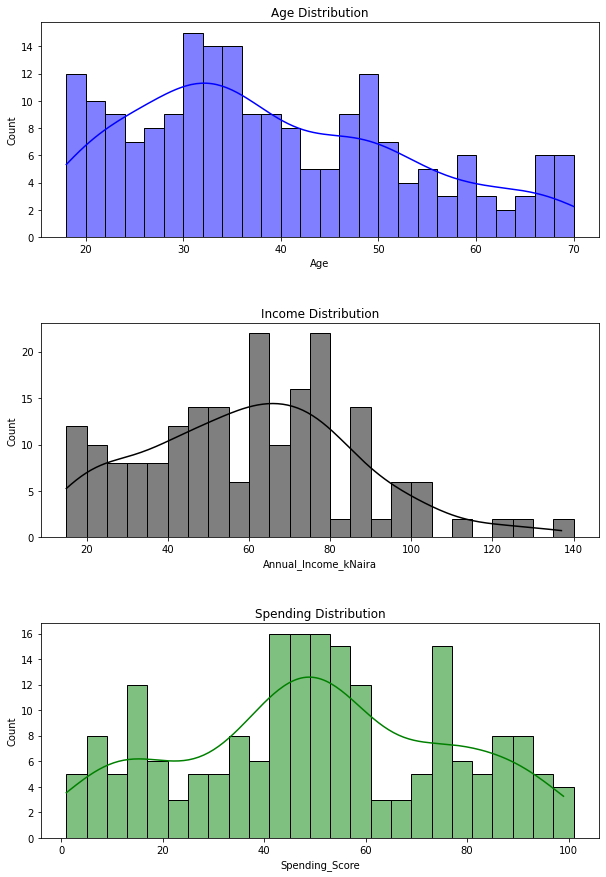

In [10]:
numerical_variables=data[['Age','Annual_Income_kNaira','Spending_Score']]
fig, axes= plt.subplots(3,1, figsize=(10,15))
sns.histplot(data=numerical_variables, x="Age",kde=True, ax=axes[0], binwidth=2,color='b')
axes[0].set_title('Age Distribution')
sns.histplot(data=numerical_variables, x="Annual_Income_kNaira", ax=axes[1], kde=True, binwidth=5,color='k')
axes[1].set_title('Income Distribution')
sns.histplot(data=numerical_variables, x="Spending_Score", ax=axes[2], kde=True, binwidth=4,color='g')
axes[2].set_title('Spending Distribution')
plt.subplots_adjust(hspace=0.4)
plt.show()

The age distribution plot is skewed to the right and more densed to the left which shows most of the customers are located towrads the lower ages at the left side with maximum density around 30-40 years, from there the number of customers declined to the right.

The income plot is also skewed to the right but its density is closer to the center than left, with maximum density around N60000 to N80000 before a declined. Most of the customers are located close to the center of the plot.

Spending score shows a normal distributions of the customers. its not skewed to any side and its high and maximum density is around 40 to 60. suggesting most customers have an average spending score.

### We Visualize the Distributions By Gender Using Boxenplot

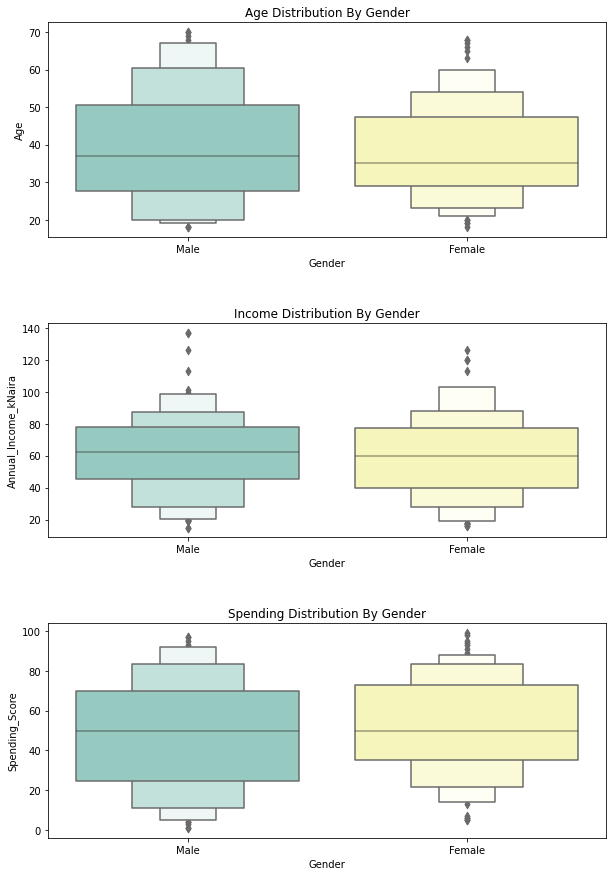

In [11]:
fig, axes= plt.subplots(3,1, figsize=(10,15))
sns.boxenplot(data=data,x="Gender", y="Age", ax=axes[0],palette="Set3")
axes[0].set_title('Age Distribution By Gender')
sns.boxenplot(data=data, x= "Gender", y="Annual_Income_kNaira", ax=axes[1], palette="Set3")
axes[1].set_title('Income Distribution By Gender')
sns.boxenplot(data=data, x="Gender", y="Spending_Score", ax=axes[2], palette="Set3")
axes[2].set_title('Spending Distribution By Gender')
plt.subplots_adjust(hspace=0.4)
plt.show()

The visualizations shows how unseperated the customers are in terms of Gender. showing close to thesame range and statistical values.

### We Visualize the Correlation between the columns to uncover Relationships

<Figure size 720x576 with 0 Axes>

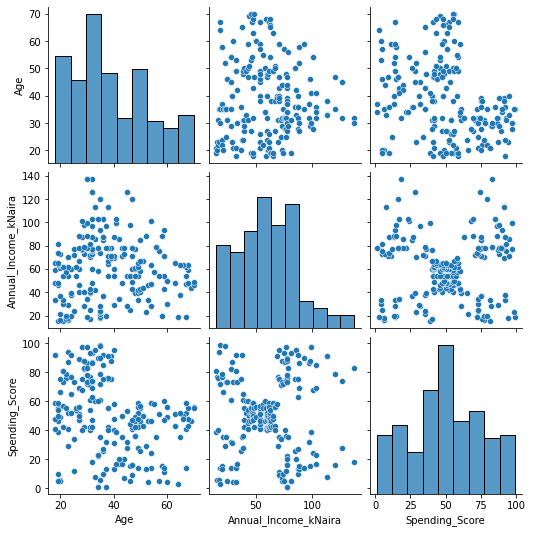

In [12]:
plt.figure(figsize=(10,8))
sns.pairplot(data=data, palette="Set3")
plt.show()

There is no strong visible relationship between columns even though age and spending score shows a weak negative correlation

### We Compute the Coefficient of the Relationships

In [13]:
data.corr()

,Age,Annual_Income_kNaira,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income_kNaira,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


### We Segregate the numerical variables into class bins using functions

In [14]:
def get_spending_class(Spending_Score):
    if Spending_Score > 76:
        return "high"
    elif Spending_Score > 51:
        return "moderate"
    elif Spending_Score > 26:
        return "medium"
    else:
        return "low"

data["Spending Class"]= data["Spending_Score"].apply(get_spending_class)

In [15]:
def get_income_class(Annual_Income_kNaira):
    if Annual_Income_kNaira > 105:
        return "high"
    elif Annual_Income_kNaira > 69:
        return "moderate"
    elif Annual_Income_kNaira > 34:
        return "medium"
    else:
        return "low"
data["Income Class"]= data["Annual_Income_kNaira"].apply(get_income_class)

In [16]:
def get_age_class(Age):
    if Age > 59:
        return "Age Group 3"
    elif Age > 39:
        return "Age Group 2"
    else:
        return "Age Group 1"
        
data["Age Group"]= data["Age"].apply(get_age_class)

In [17]:
data

,Gender,Age,Annual_Income_kNaira,Spending_Score,Spending Class,Income Class,Age Group
0,Male,19,15,39,medium,low,Age Group 1
1,Male,21,15,81,high,low,Age Group 1
2,Female,20,16,6,low,low,Age Group 1
3,Female,23,16,77,high,low,Age Group 1
4,Female,31,17,40,medium,low,Age Group 1
...,...,...,...,...,...,...,...
195,Female,35,120,79,high,high,Age Group 1
196,Female,45,126,28,medium,high,Age Group 2
197,Male,32,126,74,moderate,high,Age Group 1
198,Male,32,137,18,low,high,Age Group 1


### We Compare the different Age Groups by Spending score stacked by Income class

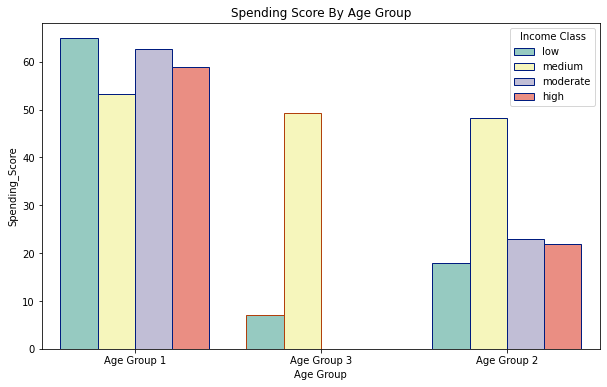

In [18]:
plt.figure(figsize=(10,6))
plt.title('Spending Score By Age Group')
sns.barplot(data=data, x="Age Group", y="Spending_Score", hue="Income Class", ci=None, palette="Set3",edgecolor=sns.color_palette("dark",2 ))
plt.show()

Age group 1 have a higher spending score and this is independant of the income class. from high to low income earners within this group have a good spending score. Group 2 the medium income earners have a higher score than other income eaners within the group.

### We Visualize the Frequency of the Groups

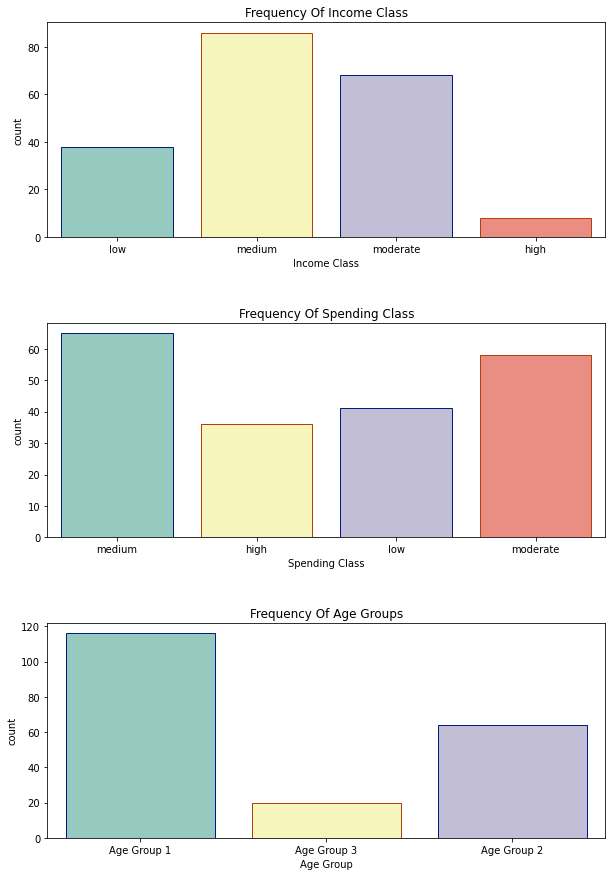

In [19]:
fig, axes= plt.subplots(3,1, figsize=(10,15))
sns.countplot(data=data, x="Income Class", ax=axes[0], palette="Set3",edgecolor=sns.color_palette("dark",2 )) 
axes[0].set_title('Frequency Of Income Class')
sns.countplot(data=data, x="Spending Class", ax=axes[1], palette="Set3",edgecolor=sns.color_palette("dark",2 ))
axes[1].set_title('Frequency Of Spending Class')
sns.countplot(data=data, x="Age Group", ax=axes[2], palette="Set3",edgecolor=sns.color_palette("dark",2 ))
axes[2].set_title('Frequency Of Age Groups')
plt.subplots_adjust(hspace=0.4)
plt.show()

Income class the medium and moderate income groups have the highest number of customers.
Spending score class was also dominated by customers with medium to moderate scores.
Age Group was heavily dominated by Age Group 1

### We get the summary statistics of each Age Group 

In [20]:
data.groupby(["Age Group"]).describe().transpose()

Age Group                   Age Group 1  Age Group 2  Age Group 3
Age                  count   116.000000    64.000000    20.000000
                     mean     28.801724    48.687500    65.650000
                     std       6.233458     5.500000     3.133436
                     min      18.000000    40.000000    60.000000
                     25%      23.000000    45.000000    63.750000
                     50%      30.000000    48.500000    66.500000
                     75%      34.000000    52.250000    68.000000
                     max      39.000000    59.000000    70.000000
Annual_Income_kNaira count   116.000000    64.000000    20.000000
                     mean     61.818966    61.890625    49.000000
                     std      28.901211    23.432522    13.875385
                     min      15.000000    20.000000    19.000000
                     25%      38.750000    43.750000    45.500000
                     50%      64.500000    60.000000    49.500000
                     75%      78.000000    77.250000    62.250000
                     max     137.000000   126.000000    65.000000
Spending_Score       count   116.000000    64.000000    20.000000
                     mean     59.905172    34.859375    43.000000
                     std      26.168344    18.536851    16.673332
                     min       1.000000     4.000000     3.000000
                     25%      42.000000    16.750000    42.500000
                     50%      64.000000    37.500000    48.500000
                     75%      79.500000    48.000000    52.750000
                     max      99.000000    95.000000    59.000000

Age Group 1 has a total number 116 customers with an average age of 29 years. The youngest customer is 18 years old and the oldest is 39. This age group also has an average income of N62,000 with 75% of them within the threshold N15,000 - N78,000. The maximum income of a customer in this age group is N137,000. They are also averaging a spending score 60 with maximum score of 99 and 75% of them within the range of 1-80.

On the other hand Age group 2 contains 64 customers with an average age of 49 years. The age group is a range between 40-59 years and 75% of them have not exceeded 52 years. They also have an average income of N62,000 with maximum income of N126,000. 75% of them are within an income range of N20,000 - N77000. The group is averaging a spending score of 35. The maximum spending score of a customer in the group is 95 and 75% of them have not exceeded 48.

Age group 3 has 20 customers with an average age of 66 years they are within the range of 60 - 70 years with 75% of them below 68 years. They have an average income N49,000 and 75% of them below N63,000. The maximum income of a customer in this group is N65,000. The average spending score in this group is 43, 75% of them are below 53 and the maximum spending score of a customer in this group is 59

## HYPOTHESIS TESTING

#### From our previous analysis we have grouped the customers into three aged groups. We need to apply statistical test to evaluate that these groups differ or not. 
 

#### Question: Does the spending score of Customers differ by age
To Answere this question we stated a hypothesis as follows

𝐻0:µ1=µ2=µ3
  The means of the three categories are equal
𝐻1:
  At least one of the means differ
  
We set the Alpha value = 0.05

In [21]:
#Test for quality of variance
scipy.stats.levene(data[data["Age Group"] == "Age Group 1"]["Spending_Score"],
                   data[data["Age Group"] == "Age Group 2"]["Spending_Score"],
                   data[data["Age Group"] == "Age Group 3"]["Spending_Score"], center='mean')

LeveneResult(statistic=7.95642565024267, pvalue=0.00047537735597862177)

In [22]:
f_statistic, p_value = scipy.stats.f_oneway(data[data["Age Group"] == "Age Group 1"]["Spending_Score"],
                   data[data["Age Group"] == "Age Group 2"]["Spending_Score"],
                   data[data["Age Group"] == "Age Group 3"]["Spending_Score"],)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 25.18832500099023, P-Value: 1.8158958499073891e-10


#### Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Question: Does the Annual income of Customers differ by age
To Answere this question we stated a hypothesis as follows

𝐻0:µ1=µ2=µ3 The means of the three categories are equal 𝐻1: At least one of the means differ

We set the Alpha value = 0.05

In [23]:
#Test for quality of variance
scipy.stats.levene(data[data["Age Group"] == "Age Group 1"]["Annual_Income_kNaira"],
                   data[data["Age Group"] == "Age Group 2"]["Annual_Income_kNaira"],
                   data[data["Age Group"] == "Age Group 3"]["Annual_Income_kNaira"], center='mean')

LeveneResult(statistic=7.536917943543455, pvalue=0.0007013660485254855)

In [24]:
f_statistic, p_value = scipy.stats.f_oneway(data[data["Age Group"] == "Age Group 1"]["Annual_Income_kNaira"],
                   data[data["Age Group"] == "Age Group 2"]["Annual_Income_kNaira"],
                   data[data["Age Group"] == "Age Group 3"]["Annual_Income_kNaira"])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 2.1780623612285885, P-Value: 0.11598080519904286


#### Conclusion: Since the p-value is greater than 0.05, we will accept the null hypothesis as there is no significant evidence that at least one of the means differ.

In [25]:
data.groupby(["Spending Class"]).describe().transpose()

Spending Class                    high         low      medium    moderate
Age                  count   36.000000   41.000000   65.000000   58.000000
                     mean    30.083333   43.268293   42.876923   36.655172
                     std      5.714018   12.534003   14.634620   14.983677
                     min     18.000000   19.000000   18.000000   18.000000
                     25%     26.250000   35.000000   31.000000   26.000000
                     50%     30.000000   44.000000   45.000000   32.000000
                     75%     35.000000   53.000000   51.000000   48.000000
                     max     40.000000   67.000000   69.000000   70.000000
Annual_Income_kNaira count   36.000000   41.000000   65.000000   58.000000
                     mean    66.555556   67.902439   55.630769   57.172414
                     std     33.591193   32.313159   19.124240   21.708708
                     min     15.000000   16.000000   15.000000   17.000000
                     25%     32.000000   33.000000   44.000000   43.000000
                     50%     76.500000   78.000000   58.000000   55.500000
                     75%     87.250000   87.000000   64.000000   70.500000
                     max    137.000000  137.000000  126.000000  126.000000
Spending_Score       count   36.000000   41.000000   65.000000   58.000000
                     mean    87.777778   12.536585   41.953846   62.741379
                     std      6.476821    6.782690    6.610670    8.440837
                     min     77.000000    1.000000   27.000000   52.000000
                     25%     82.750000    6.000000   39.000000   55.000000
                     50%     88.000000   13.000000   42.000000   59.500000
                     75%     92.250000   17.000000   47.000000   72.750000
                     max     99.000000   26.000000   51.000000   76.000000

### We read the marketing Data for Analysis


In [26]:
df.tail(20)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
170,Shop - Phrase - Desk - Coupon Code,November,7475,1977,0.26,382,0.12,2616,1.32,2368,50293.23,-248.203
171,Shop - Phrase - Desk - Sale,November,10262,667,0.06,30,0.05,386,0.58,165,3302.80,-220.842
172,Shop - Exact - Mob - Competitor,November,3155,871,0.28,54,0.06,402,0.46,268,6622.27,-134.484
173,Shop - 1:1 - Desk - [shop promo],November,2506,708,0.28,137,0.12,1039,1.47,910,19932.69,-129.125
174,Shop - Exact - Desk - Competitor,November,1692,341,0.20,43,0.09,342,1.01,258,5309.34,-84.485
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730
176,Shop - Exact - Desk - Offer,November,2760,434,0.16,71,0.12,553,1.28,496,11027.61,-56.945
177,Shop - Exact - Mob - Promo Code,November,51335,19009,0.37,2095,0.08,12189,0.64,12145,256314.93,-44.189
178,Shop - Exact - Desk - Free Shipping,November,1805,354,0.20,55,0.14,134,0.38,95,2156.07,-38.959
179,Shop - Exact - Mob - Free Shipping,November,3279,618,0.19,52,0.10,118,0.19,93,1855.08,-25.215


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [28]:
df["Ad Group"].unique()

array(['Shop - 1:1 - Desk - [shop coupon code]',
       'Shop - 1:1 - Desk - [shop coupon]',
       'Shop - 1:1 - Desk - [shop discount code]',
       'Shop - 1:1 - Desk - [shop promo code]',
       'Shop - 1:1 - Desk - [shop promo]',
       'Shop - 1:1 - Mob - [shop coupon code]',
       'Shop - 1:1 - Mob - [shop coupon]',
       'Shop - 1:1 - Mob - [shop discount code]',
       'Shop - 1:1 - Mob - [shop promo code]',
       'Shop - 1:1 - Mob - [shop promo]',
       'Shop - Exact - Desk - Competitor',
       'Shop - Exact - Desk - Coupon Code',
       'Shop - Exact - Desk - Discount Code',
       'Shop - Exact - Desk - Free Shipping',
       'Shop - Exact - Desk - Offer', 'Shop - Exact - Desk - Promo Code',
       'Shop - Exact - Desk - Sale', 'Shop - Exact - Mob - Competitor',
       'Shop - Exact - Mob - Coupon Code',
       'Shop - Exact - Mob - Discount Code',
       'Shop - Exact - Mob - Free Shipping', 'Shop - Exact - Mob - Offer',
       'Shop - Exact - Mob - Promo Code', 'Shop

#### For Exercise sake the columns where mapped to a new name

In [29]:
name_mapping={'Shop - 1:1 - Desk - [shop coupon code]': 'Facebook',
       'Shop - 1:1 - Desk - [shop coupon]': 'Facebook',
       'Shop - 1:1 - Desk - [shop discount code]' : 'Facebook',
       'Shop - 1:1 - Desk - [shop promo code]': 'Facebook',
       'Shop - 1:1 - Desk - [shop promo]': 'Facebook',
       'Shop - 1:1 - Mob - [shop coupon code]' : 'Facebook',
       'Shop - 1:1 - Mob - [shop coupon]' : 'Facebook',
       'Shop - 1:1 - Mob - [shop discount code]' : 'Facebook',
       'Shop - 1:1 - Mob - [shop promo code]' : 'Facebook',
       'Shop - 1:1 - Mob - [shop promo]' : 'Facebook',
       'Shop - Exact - Desk - Competitor' : 'Twitter',
       'Shop - Exact - Desk - Coupon Code' : 'Twitter',
       'Shop - Exact - Desk - Discount Code' : 'Twitter',
       'Shop - Exact - Desk - Free Shipping' : 'Twitter',
       'Shop - Exact - Desk - Offer' : 'Twitter', 
       'Shop - Exact - Desk - Promo Code' : 'Twitter',
       'Shop - Exact - Desk - Sale' : 'Twitter', 
       'Shop - Exact - Mob - Competitor' : 'Twitter',
       'Shop - Exact - Mob - Coupon Code' : 'Twitter',
       'Shop - Exact - Mob - Discount Code' : 'Twitter',
       'Shop - Exact - Mob - Free Shipping' : 'Twitter',
       'Shop - Exact - Mob - Offer' : 'Twitter',
       'Shop - Exact - Mob - Promo Code' : 'Twitter', 
       'Shop - Exact - Mob - Sale' : 'Twitter',
       'Shop - Phrase - Desk - Competitor' : 'Instagram',
       'Shop - Phrase - Desk - Coupon Code' : 'Instagram',
       'Shop - Phrase - Desk - Discount Code' : 'Instagram',
       'Shop - Phrase - Desk - Free Shipping' : 'Instagram',
       'Shop - Phrase - Desk - Offer' : 'Instagram',
       'Shop - Phrase - Desk - Promo Code' : 'Instagram', 
       'Shop - Phrase - Desk - Sale' : 'Instagram',
       'Shop - Phrase - Mob - Competitor' : 'Instagram',
       'Shop - Phrase - Mob - Coupon Code' : 'Instagram',
       'Shop - Phrase - Mob - Discount Code' : 'Instagram',
       'Shop - Phrase - Mob - Free Shipping' : 'Instagram',
       'Shop - Phrase - Mob - Offer' : 'Instagram', 
       'Shop - Phrase - Mob - Promo Code' : 'Instagram',
       'Shop - Phrase - Mob - Sale' : 'Instagram',
       'Shop - Exact - Desk - Black Friday/Cyber Monday' : 'Twitter',
       'Shop - Exact - Mob - Black Friday/Cyber Monday' : 'Twitter'}

In [30]:
def change_names(value):
    return name_mapping.get(value, value)
df['new'] = list(map(change_names, df['Ad Group']))

In [31]:
df.new.value_counts()

Twitter      72
Instagram    68
Facebook     50
Name: new, dtype: int64

In [32]:
df.drop(columns='Ad Group', inplace = True)

In [33]:
df.columns

Index(['Month', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'Conv Rate',
       'Cost', 'CPC', 'Revenue', 'Sale Amount', 'P&L', 'new'],
      dtype='object')

In [34]:
df.head(40)

,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,new
0,July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,Facebook
1,July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,Facebook
2,July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136,Facebook
3,July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921,Facebook
4,July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604,Facebook
5,July,46507,21756,0.47,1665,0.05,13157,0.60,8550,185824.49,-4606.713,Facebook
6,July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,Facebook
7,July,9950,4283,0.43,347,0.05,2637,0.62,2038,46026.32,-598.993,Facebook
8,July,57373,27121,0.47,2940,0.07,16946,0.62,14565,321387.88,-2380.616,Facebook
9,July,1875,706,0.38,69,0.07,485,0.69,409,8946.99,-75.734,Facebook


In [35]:
df.rename(columns={'new': 'Channel'}, inplace=True)

In [36]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,190,5,November,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Impressions,190.0,NaN,NaN,NaN,14077.363158,29771.686227,35.0,1065.0,4969.0,13380.0,276568.0
Clicks,190.0,NaN,NaN,NaN,4865.805263,11348.529219,2.0,264.5,930.0,4190.5,99526.0
CTR,190.0,NaN,NaN,NaN,0.272105,0.107894,0.05,0.1925,0.285,0.36,0.47
Conversions,190.0,NaN,NaN,NaN,505.242105,1052.202922,0.0,24.0,70.5,428.25,7563.0
Conv Rate,190.0,NaN,NaN,NaN,0.079737,0.052859,0.0,0.05,0.07,0.1,0.5
Cost,190.0,NaN,NaN,NaN,3344.063158,6524.606753,1.0,188.5,563.5,2967.0,43542.0
CPC,190.0,NaN,NaN,NaN,0.791263,0.403312,0.14,0.48,0.635,1.1075,2.02
Revenue,190.0,NaN,NaN,NaN,2957.684211,5962.413097,0.0,144.5,459.5,2672.25,42440.0
Sale Amount,190.0,NaN,NaN,NaN,63416.180579,125414.656922,0.0,2985.135,10274.105,59345.195,886095.31


### We visualize The data after the mapping

<AxesSubplot:xlabel='Month', ylabel='Impressions'>

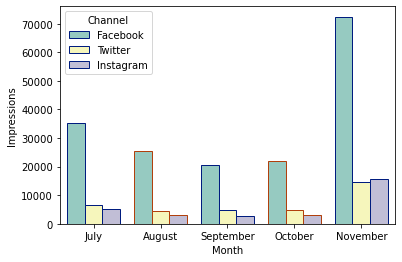

In [37]:
sns.barplot(data=df, x="Month", y="Impressions", hue="Channel", ci=None, palette="Set3", edgecolor=sns.color_palette("dark", 2))

Among the mediums used facebook has the most impressions generally across all months while twitter is a little bit higher than instagram except for november. This entails the most ads ran on facebook are been viewed most. 

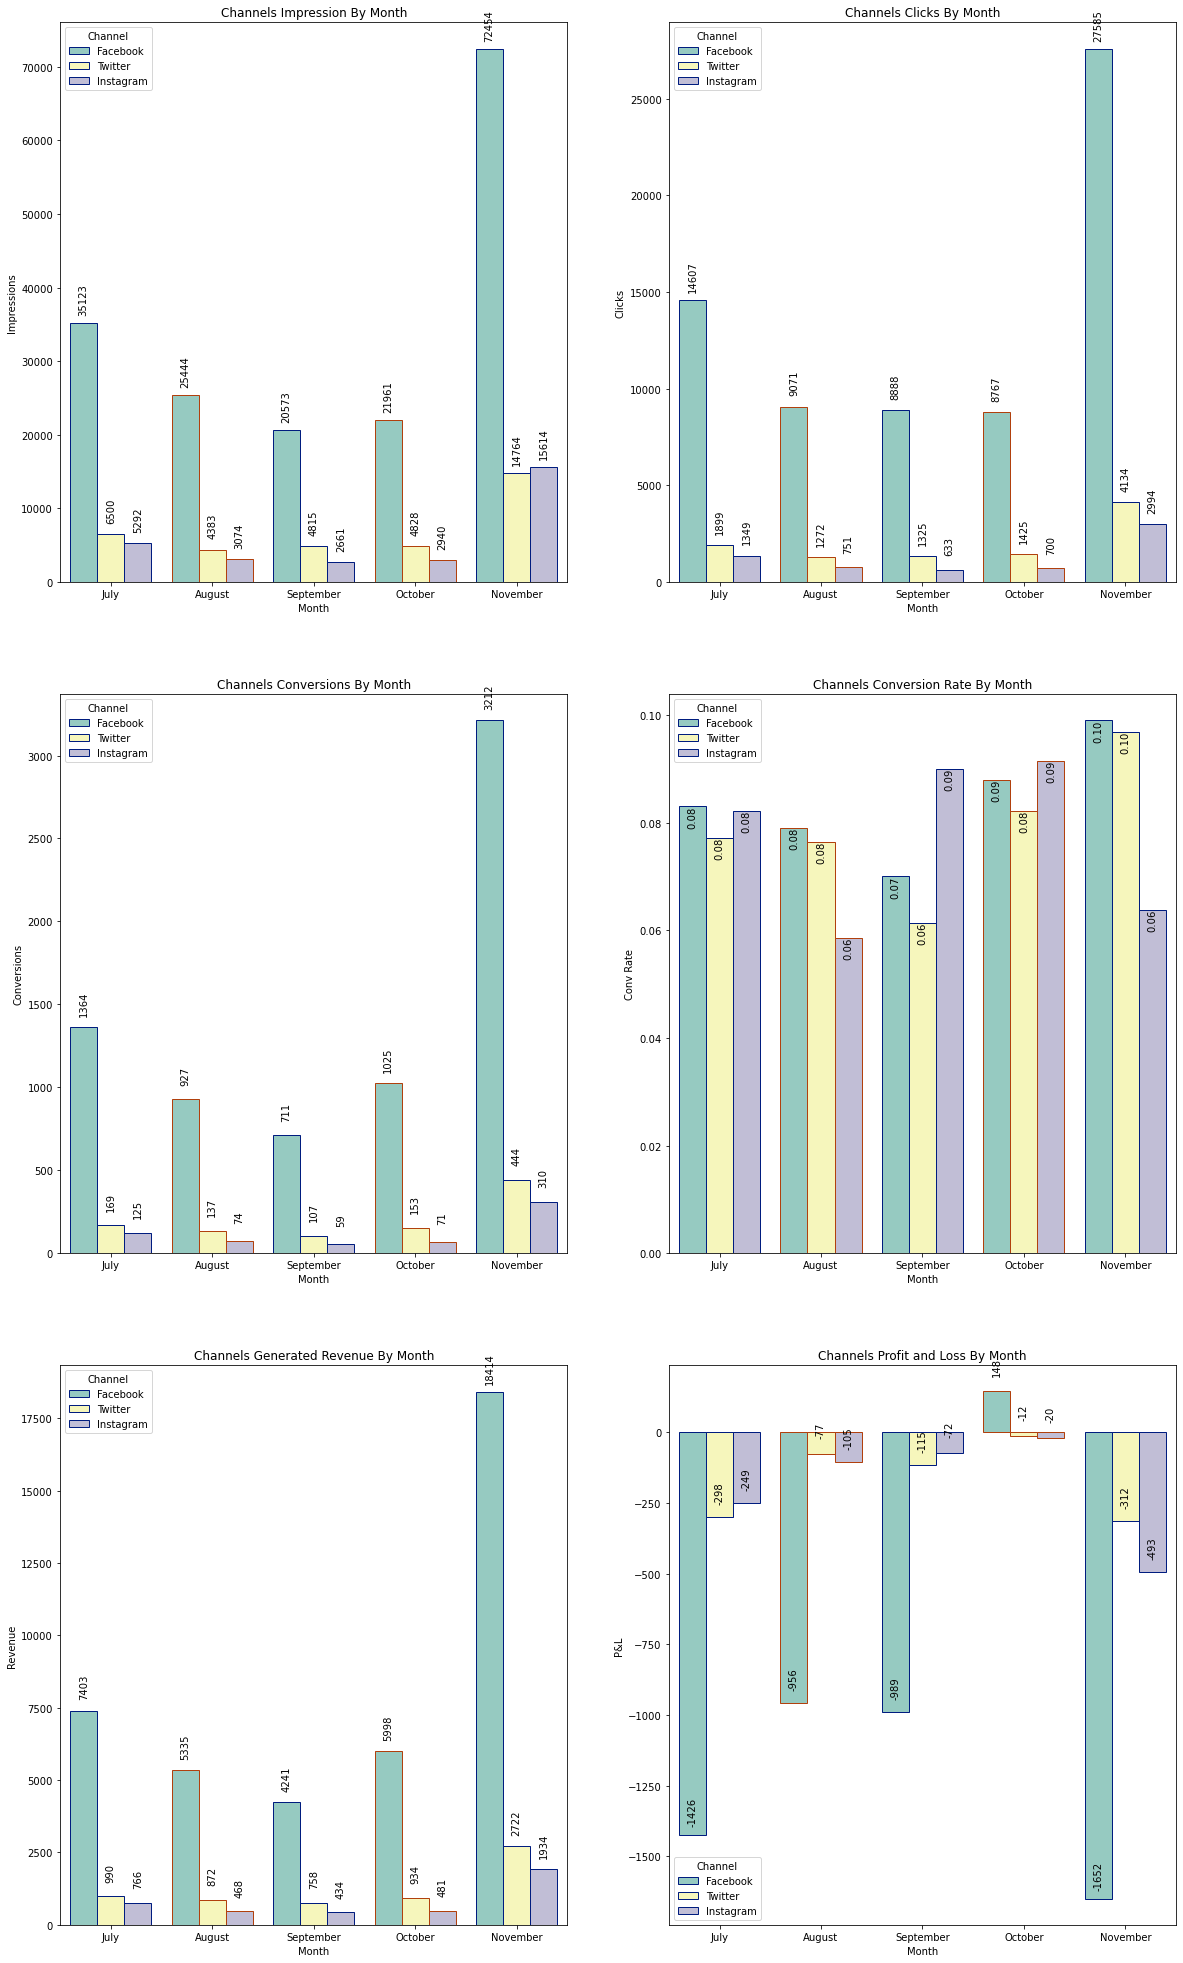

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(20, 35))

sns.barplot(data=df, x="Month", y="Impressions", hue="Channel", ax=axes[0, 0], ci=None, palette="Set3", edgecolor=sns.color_palette("dark", 2))
for p in axes[0, 0].patches:
    axes[0, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=df, x="Month", y="Clicks", hue="Channel", ax=axes[0, 1], ci=None, palette="Set3", edgecolor=sns.color_palette("dark", 2))
for p in axes[0, 1].patches:
    axes[0, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=df, x="Month", y="Conversions", hue="Channel", ax=axes[1, 0], ci=None, palette="Set3", edgecolor=sns.color_palette("dark", 2))
for p in axes[1, 0].patches:
    axes[1, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=df, x="Month", y="Conv Rate", hue="Channel", ax=axes[1, 1], ci=None, palette="Set3", edgecolor=sns.color_palette("dark", 2))
for p in axes[1, 1].patches:
    axes[1, 1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points', rotation='vertical')

sns.barplot(data=df, x="Month", y="Revenue", hue="Channel", ax=axes[2, 0], ci=None, palette="Set3", edgecolor=sns.color_palette("dark", 2))
for p in axes[2, 0].patches:
    axes[2, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=df, x="Month", y="P&L", hue="Channel", ax=axes[2, 1], ci=None, palette="Set3", edgecolor=sns.color_palette("dark", 2))
for p in axes[2, 1].patches:
    axes[2, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

axes[0, 0].set_title('Channels Impression By Month')
axes[0, 1].set_title('Channels Clicks By Month')
axes[1, 0].set_title('Channels Conversions By Month')
axes[1, 1].set_title('Channels Conversion Rate By Month')
axes[2, 0].set_title('Channels Generated Revenue By Month')
axes[2, 1].set_title('Channels Profit and Loss By Month')

plt.show()


All the marketting metrics shows the domination of facebook in ads except for the conversion rate. The conversion rate is the amount of purchases/customers gotten from a particular ad. And the visuals has shown interms of this metrics facebook does not dominate. infact it has shown this metrics is highly competative between the channels.

In [39]:
#We find the correlation between this metrices and see how related they are to each other and if coversion rate differs from others
df.corr()

,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
Impressions,1.000000,0.988032,0.324579,0.832997,-0.089925,0.844886,-0.118672,0.815881,0.813971,-0.717494
Clicks,0.988032,1.000000,0.397207,0.856285,-0.076871,0.862424,-0.111701,0.836894,0.835867,-0.705471
CTR,0.324579,0.397207,1.000000,0.453325,-0.038960,0.456116,0.203834,0.456887,0.465845,-0.278861
Conversions,0.832997,0.856285,0.453325,1.000000,0.050684,0.993739,0.092966,0.998110,0.997792,-0.589792
Conv Rate,-0.089925,-0.076871,-0.038960,0.050684,1.000000,0.040994,0.311661,0.059491,0.059131,0.096628
Cost,0.844886,0.862424,0.456116,0.993739,0.040994,1.000000,0.107707,0.993580,0.993945,-0.664932
CPC,-0.118672,-0.111701,0.203834,0.092966,0.311661,0.107707,1.000000,0.117979,0.122349,0.000774
Revenue,0.815881,0.836894,0.456887,0.998110,0.059491,0.993580,0.117979,1.000000,0.999715,-0.576166
Sale Amount,0.813971,0.835867,0.465845,0.997792,0.059131,0.993945,0.122349,0.999715,1.000000,-0.580682
P&L,-0.717494,-0.705471,-0.278861,-0.589792,0.096628,-0.664932,0.000774,-0.576166,-0.580682,1.000000


All the metrics are stongly positively correlated and strongly negatively correlated except for conversion rate which is only weakly positively correlated to Cost per click. 

In [40]:
#Lets get the correlation again for the sum of all metrices
group=df.groupby(['Channel', 'Month']).sum().reset_index()
group.corr()

,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
Impressions,1.000000,0.985756,0.313997,0.986679,-0.187359,0.992490,-0.397100,0.986806,0.987612,-0.837046
Clicks,0.985756,1.000000,0.423429,0.991798,-0.238855,0.994710,-0.428725,0.989282,0.991563,-0.836611
CTR,0.313997,0.423429,1.000000,0.373339,-0.276310,0.365800,0.053555,0.365504,0.376781,-0.293078
Conversions,0.986679,0.991798,0.373339,1.000000,-0.184552,0.998137,-0.373987,0.999501,0.999617,-0.781337
Conv Rate,-0.187359,-0.238855,-0.276310,-0.184552,1.000000,-0.196487,0.594264,-0.176078,-0.185723,0.330328
Cost,0.992490,0.994710,0.365800,0.998137,-0.196487,1.000000,-0.384536,0.997686,0.998364,-0.814225
CPC,-0.397100,-0.428725,0.053555,-0.373987,0.594264,-0.384536,1.000000,-0.363153,-0.368930,0.488145
Revenue,0.986806,0.989282,0.365504,0.999501,-0.176078,0.997686,-0.363153,1.000000,0.999779,-0.772870
Sale Amount,0.987612,0.991563,0.376781,0.999617,-0.185723,0.998364,-0.368930,0.999779,1.000000,-0.781084
P&L,-0.837046,-0.836611,-0.293078,-0.781337,0.330328,-0.814225,0.488145,-0.772870,-0.781084,1.000000


The correletation seems stronger after the summation and the correletion between Conversion rate and Cost per click has also increased

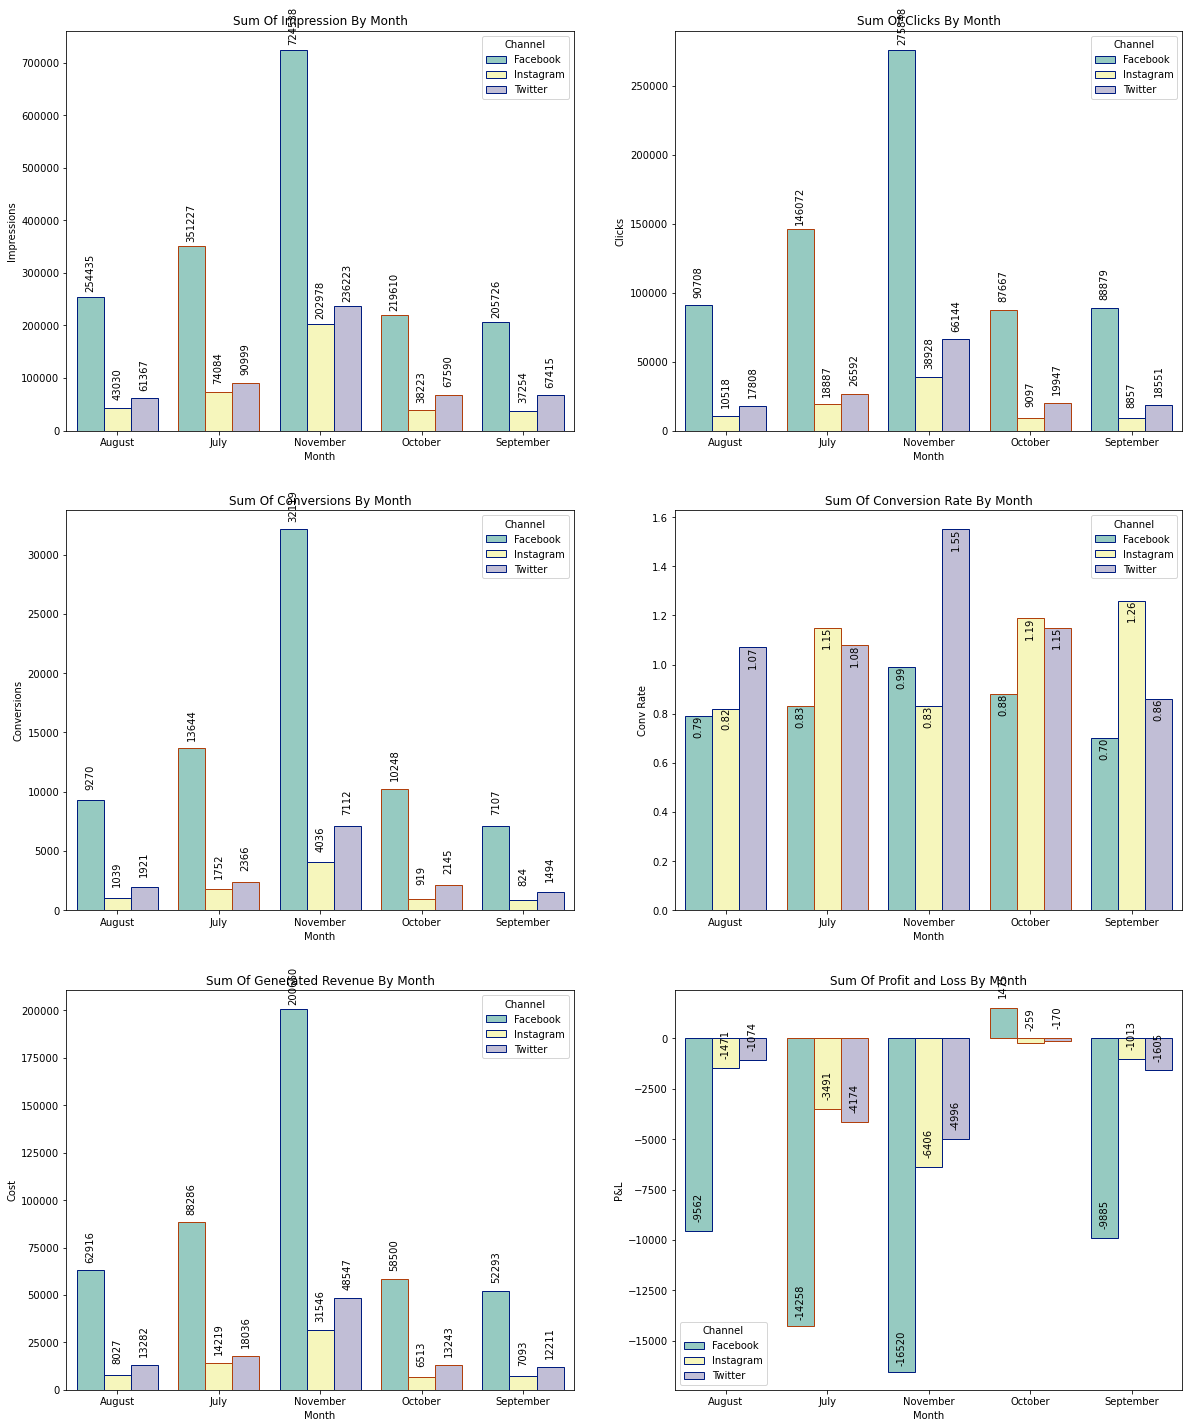

In [41]:
fig, axes= plt.subplots(3,2, figsize=(20,25))
sns.barplot(data=group, x="Month", y="Impressions", hue='Channel', ax=axes[0,0], ci=None, palette="Set3",edgecolor=sns.color_palette("dark",2 ))
for p in axes[0, 0].patches:
    axes[0, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=group, x="Month", y="Clicks", hue='Channel', ax=axes[0,1], ci=None, palette="Set3",edgecolor=sns.color_palette("dark",2 ))
for p in axes[0, 1].patches:
    axes[0, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=group, x="Month", y="Conversions", hue='Channel', ax=axes[1,0], ci=None, palette="Set3",edgecolor=sns.color_palette("dark",2 ))
for p in axes[1, 0].patches:
    axes[1, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=group, x="Month", y="Conv Rate", hue='Channel', ax=axes[1,1], ci=None, palette="Set3",edgecolor=sns.color_palette("dark",2 ))
for p in axes[1, 1].patches:
    axes[1, 1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points', rotation='vertical')

sns.barplot(data=group, x="Month", y="Cost", hue='Channel', ax=axes[2,0], ci=None, palette="Set3",edgecolor=sns.color_palette("dark",2 ))
for p in axes[2, 0].patches:
    axes[2, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

sns.barplot(data=group, x="Month", y="P&L", hue='Channel', ax=axes[2,1], ci=None, palette="Set3",edgecolor=sns.color_palette("dark",2 ))
for p in axes[2, 1].patches:
    axes[2, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 24), textcoords='offset points', rotation='vertical')

axes[0,0].set_title('Sum Of Impression By Month')
axes[0,1].set_title('Sum Of Clicks By Month')
axes[1,0].set_title('Sum Of Conversions By Month')
axes[1,1].set_title('Sum Of Conversion Rate By Month')
axes[2,0].set_title('Sum Of Generated Revenue By Month')
axes[2,1].set_title('Sum Of Profit and Loss By Month')
plt.show()
        

From the summation chart its clearly evident facebook has a low conversion rate across all months compared to other channels.

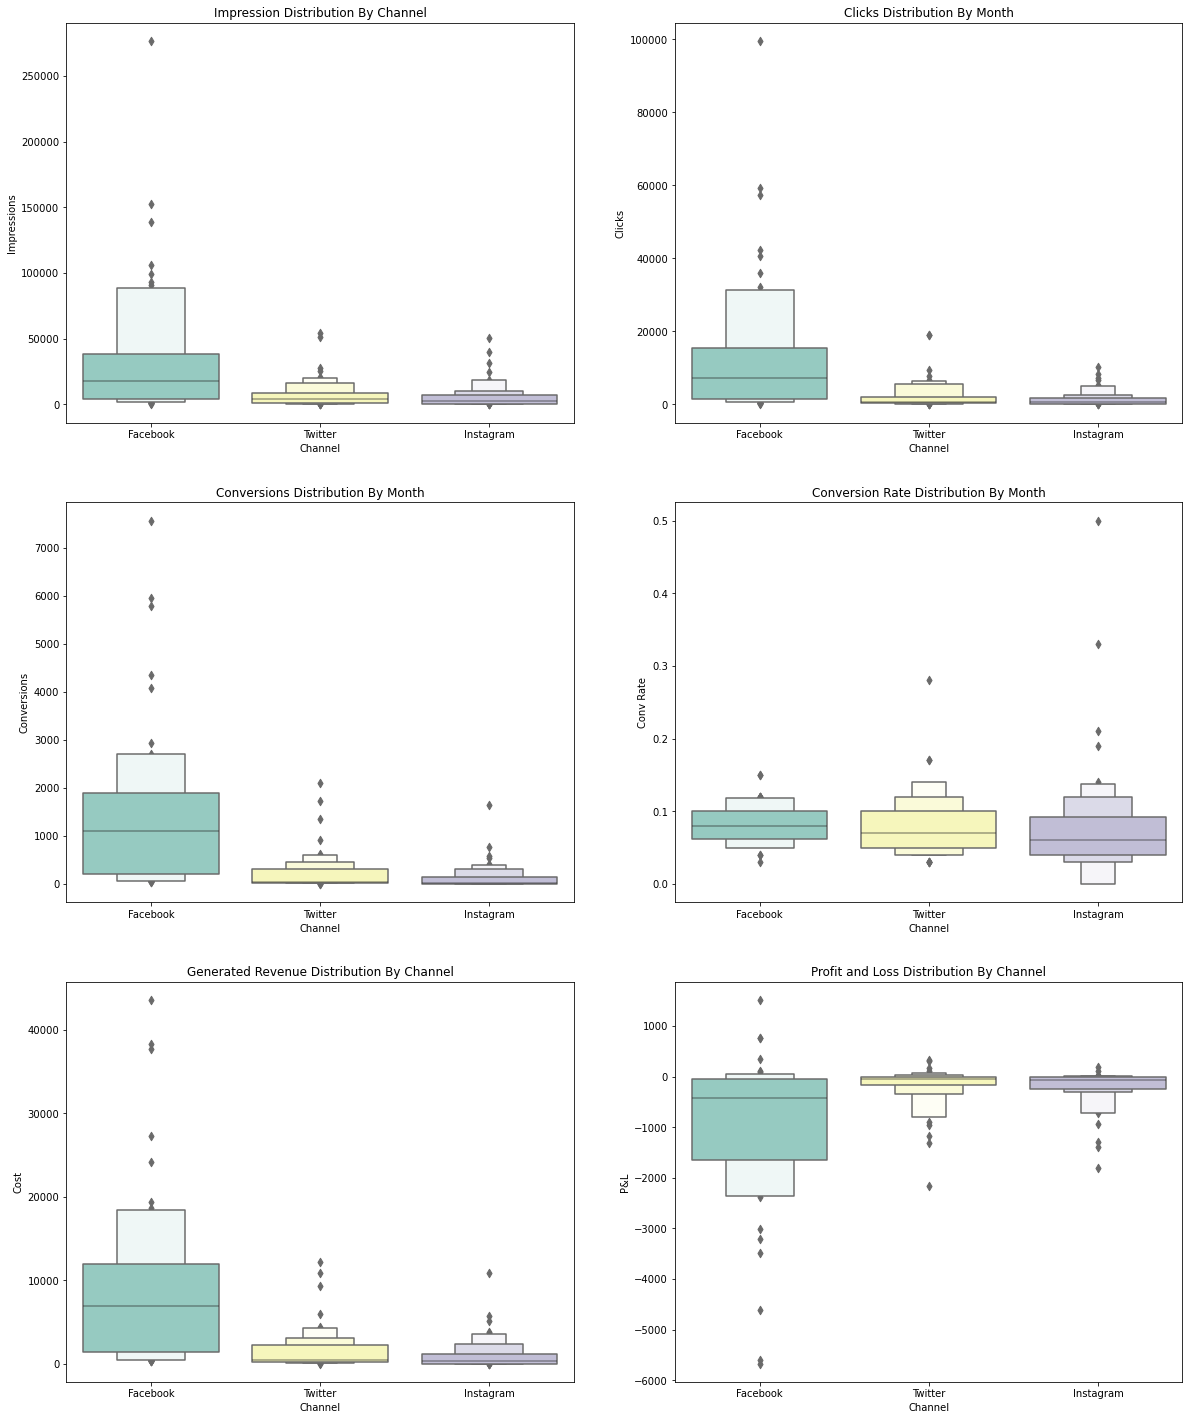

In [42]:
fig, axes= plt.subplots(3,2, figsize=(20,25))
sns.boxenplot(data=df, x="Channel", y="Impressions", ax=axes[0,0], palette="Set3")
sns.boxenplot(data=df, x="Channel", y="Clicks", ax=axes[0,1], palette="Set3")
sns.boxenplot(data=df, x="Channel", y="Conversions", ax=axes[1,0], palette="Set3")
sns.boxenplot(data=df, x="Channel", y="Conv Rate", ax=axes[1,1], palette="Set3")
sns.boxenplot(data=df, x="Channel", y="Cost", ax=axes[2,0], palette="Set3")
sns.boxenplot(data=df, x="Channel", y="P&L", ax=axes[2,1], palette="Set3")
axes[0,0].set_title('Impression Distribution By Channel')
axes[0,1].set_title('Clicks Distribution By Month')
axes[1,0].set_title('Conversions Distribution By Month')
axes[1,1].set_title('Conversion Rate Distribution By Month')
axes[2,0].set_title('Generated Revenue Distribution By Channel')
axes[2,1].set_title('Profit and Loss Distribution By Channel')
plt.show()

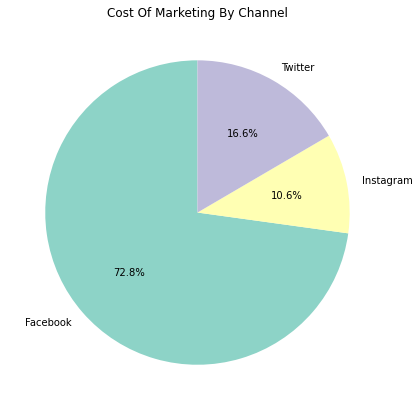

In [43]:
fig, axes = plt.subplots(figsize=(10, 7))
plt.title('Cost Of Marketing By Channel')

# Calculate the total cost for each channel
channel_cost = df.groupby('Channel')['Cost'].sum()

# Plot the pie chart
axes.pie(channel_cost, labels=channel_cost.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

# Set aspect ratio to be equal to ensure a circular pie
axes.set_aspect('equal')

plt.show()


The cost of marketting is hugely allocated to facebook which is about 73% of the total cost. Twitter has a 16.6% and instagram has 10.6% of the total propotion

## Conclusion

This project has yielded valuable insights that can significantly inform the company's marketing strategies and decision-making processes. Here are the comprehensive conclusions drawn from the analysis:

1. **Customer Demographics:** The analysis underscores the importance of customer demographics in shaping marketing strategies. Specifically, the company should focus its marketing efforts on individuals from both the young and middle-aged demographic groups. These segments exhibit substantial potential for customer engagement.

2. **Resource Allocation:** To optimize marketing expenditures and enhance campaign effectiveness, a recommended course of action is to reconsider the allocation of resources. While Facebook has been a prominent channel, diversifying resources across other marketing campaigns is advisable. This strategic shift can broaden the reach and potentially lead to an improved conversion rate, leveraging untapped marketing channels.

3. **Segmentation Opportunities:** The data suggests the presence of potential customer clusters based on spending scores and income levels. However, it is important to note that due to data limitations, drawing definitive conclusions from these clusters is challenging at this stage. Nevertheless, this presents an exciting opportunity for tailored marketing strategies. With the collection of additional data, the company can explore and capitalize on these potential segments, fostering more personalized marketing approaches and strengthening customer engagement and satisfaction.

4. **Continuous Data Collection:** To unlock the full potential of customer segmentation and tailored marketing, an ongoing commitment to data collection is crucial. Regular data updates and an investment in data analytics can refine marketing strategies over time, ensuring that the company remains agile and responsive to changing customer preferences.

5. **Competitive Conversion Rate:** The competitive conversion rate observed across all campaigns indicates the effectiveness of the company's marketing efforts. It is important to maintain this momentum and continue optimizing conversion strategies across various channels.

In conclusion, the comprehensive conclusions derived from this project provide a robust foundation for enhancing the company's marketing endeavors. By prioritizing targeted demographic groups, optimizing resource allocation, exploring segmentation opportunities, and maintaining a commitment to data-driven decision-making, the company is poised to achieve greater marketing success and customer satisfaction in the evolving landscape of the marketplace.


## Recommendations

1. **Targeting Demographics:** The company should strategically focus its marketing efforts on individuals within the young and middle-aged demographic groups. This targeted approach aligns with the data insights, emphasizing the importance of these segments in potential customer engagement.

2. **Optimizing Resource Allocation:** To optimize marketing expenditures and potentially enhance campaign effectiveness, we recommend revising the allocation of resources. While Facebook has been a significant part of the marketing strategy, diversifying resources across other marketing campaigns should be considered. This shift in allocation has the potential to expand the reach and improve the overall conversion rate by tapping into previously underutilized channels.

3. **Segmentation Opportunities:** The analysis reveals that customers may be grouped into potential clusters based on spending scores and income. However, due to data limitations, drawing definitive conclusions from these clusters is challenging. We strongly advise leveraging the opportunity presented by this potential segmentation. With the collection of additional data, the company can explore tailored marketing strategies that resonate with specific customer clusters, thus enhancing customer engagement and satisfaction.

Incorporating these recommendations into the company's marketing strategy can lead to more effective targeting, improved resource allocation, and a deeper understanding of customer segments, ultimately fostering enhanced marketing campaign outcomes.

Visit dangusaualee.github.io for the presentation